## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

In [51]:
from collections import defaultdict
from functools import wraps
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]
price = defaultdict(int)

In [52]:
for i,p in enumerate(original_price):
    price[i+1] = p

In [53]:
price[11]

35

In [177]:
already_computed = {}

In [178]:
def memo(f):
    @wraps(f)
    def _wrap(arg):
        result = None
        if arg in already_computed:
            result = already_computed[arg]
        else:
            result = f(arg)
            already_computed[arg] = result
        return result
    return _wrap

In [63]:
@memo
def r1(n):
    return max([price[n]] + [r1(i) + r1(n-i) for i in range(1,n)])

In [156]:
r1(19)

57

In [187]:
solution = {}

In [192]:
from functools import lru_cache
@lru_cache(maxsize=2**10)
def r2(n):
    max_price,max_split = max(
        [(price[n],0)] + [(r2(i) + r2(n-i), i) for i in range(1,n)], key=lambda x:x[0]
    )
    solution[n] = (n - max_split,max_split)
    return max_price

In [205]:
r2(23)

71

In [206]:
print(already_computed)

{1: 1, 2: 5, 3: 8, 4: 10, 5: 13, 6: 17, 7: 18, 8: 22}


In [207]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1)}

In [208]:
def parse_solution(n):
    left,right = solution[n]
    if right == 0: return [left]
    return parse_solution(left)+parse_solution(right)

In [210]:
parse_solution(23)

[11, 11, 1]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.
Âú®Á¨¨‰∫åÊ¨°‰Ωú‰∏ö‰∏≠Â∑≤ÁªèÂÆûÁé∞

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [1]:
solution2 = {}

In [2]:
from functools import lru_cache
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution2[(string1, string2)] = operation 
    
    return min_distance

In [3]:
edit_distance('ABCDE', 'ABCCEF')

2

In [4]:
solution2

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [5]:
def stop_edit(string1, string2): return string1 == string2


# now we look for solutions in the "solution" dictionary

def parse_solution(string1, string2, solution_dic):
    
    parsed_solutions = [] 
    
    while not stop_edit(string1, string2):
        operation = solution_dic[(string1, string2)] # "Êü•Ë°®" ËøáÁ®ã
        
        if 'SUB' in operation:
            string1, string2 = string1[:-1], string2[:-1] 
            # if substitution, both forward and compare
        elif operation == '':
            string1, string2 = string1[:-1], string2[:-1]
            # if no edits, both forward and compare
        elif 'DEL' in operation:
            string1, string2 = string1[:-1], string2 
            # delete tail of string1 and then compare
        elif 'ADD' in operation:
            string1, string2 = string1, string2[:-1] 
            # delete tail of string2 and then compare
        
        parsed_solutions.append(operation)
    
    return parsed_solutions

In [6]:
edit_distance('BEIJING', 'TIANJIN')

5

In [7]:
solution2

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F',
 ('B', 'T'): 'SUB B => T',
 ('B', 'TI'): 'ADD I',
 ('B', 'TIA'): 'ADD A',
 ('B', 'TIAN'): 'ADD N',
 ('B', 'TIANJ'): 'ADD J',
 ('B', 'TIANJI'): 'ADD I',
 ('B', 'TIANJIN'): 'ADD N',
 ('BE', 'T'): 'DEL E',
 ('BE', 'TI'): 'S

In [8]:
parse_solution("BEIJING","TIANJIN",solution2)

['DEL G', '', '', '', 'ADD N', 'ADD A', '', 'DEL E', 'SUB B => T']

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ ÈªëÂÆ¢‰∏éÁîªÂÆ∂
+ Êï∞Â≠¶‰πãÁæé
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¬∂

Ans:ÊâæÂà∞ÂáΩÊï∞ÂèòÂåñÁöÑË∂ãÂäøÔºåÊõ¥Âø´ÁöÑÈÄºËøëÊúÄ‰ºòÁªìÊûú

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¬∂

Ans:ÂØπÂ§öÂÖÉÂáΩÊï∞ÁöÑÂèÇÊï∞Ê±Ç‚àÇÂÅèÂØºÊï∞ÔºåÊääÊ±ÇÂæóÁöÑÂêÑ‰∏™ÂèÇÊï∞ÁöÑÂÅèÂØºÊï∞‰ª•ÂêëÈáèÁöÑÂΩ¢ÂºèÂÜôÂá∫Êù•ÔºåÂ∞±ÊòØÊ¢ØÂ∫¶,Ê¢ØÂ∫¶ÁöÑÊñπÂêëÂ∞±ÊòØÂáΩÊï∞Âú®ÁªôÂÆöÁÇπÂèòÂåñÊúÄÂø´ÁöÑÊñπÂêëÔºå‰∏ãÈôçÂ∞±ÊòØÂáèÂ∞èÊúÄÂø´ÁöÑÊñπÂêë


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:ÂèØ‰ª•ÊçïËé∑Â•ΩÁöÑÂèòÂåñË∂ãÂäøÔºåÂπ∂‰∏ÄÁõ¥ÊúùÂ•ΩÁöÑÊñπÂêëÈù†Ëøë

4. Using the simple words to describe: What's the machine leanring.¬∂

Ans:Ê†πÊçÆÂ∑≤ÊúâÊï∞ÊçÆÔºåËÆ°ÁÆóÂá∫Êüê‰ª∂‰∫ãÊÉÖÁöÑÂÜ≥Á≠ñÊñπÊ≥ï

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Âä®ÊÄÅËßÑÂàíÈÄÇÁî®‰∫éÊúâÈáçÂ§çÂ≠êÈóÆÈ¢òÂíåÊúÄ‰ºòÂ≠êÁªìÊûÑÁöÑÊÉÖÂÜµÔºåÂ∞ÜÈáçÂ§çÁöÑËÆ°ÁÆóÂèòÊàêÊõ¥Âø´ÁöÑÊü•Ë°®ÔºõÊêúÁ¥¢ÊòØÂØπÂØπË±°ÁöÑÊü•ÊâæÔºåÊ∂âÂèä‰∏çÂêåÁöÑÊêúÁ¥¢ÊñπÂºè

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Âä®ÊÄÅËßÑÂàíÊòØ‰∏ÄÁßçËß£ÂÜ≥ÁâπÂÆöÈóÆÈ¢òÁöÑÊï∞Â≠¶ÊñπÊ≥ïÔºåÂπ∂‰∏çÊòØÈíàÂØπÊüêÁßçÂÖ∑‰ΩìÊÉÖÂÜµÔºåÊâÄ‰ª•Ê≤°ÊúâÂõ∫ÂÆöÁöÑinputÊù•Áî®Êù•ËÆ≠ÁªÉÂá∫‰∏Ä‰∏™functionÊù•Ëß£ÂÜ≥ÂÖ∑‰ΩìÈóÆÈ¢ò

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

ËÉåÂåÖÈóÆÈ¢òÔºåÊóÖË°åÂïÜÈóÆÈ¢òÔºåFibonacciÊï∞Âàó

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

ÊãºÂÜôÁ∫†Ê≠£ÔºåËÅîÊÉ≥ËæìÂÖ•ÔºåÁõ∏‰ººÂÜÖÂÆπÊé®Ëçê

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

ÊúÄ‰ºòÂ≠êÁªìÊûÑÔºö‰∏Ä‰∏™ÊúÄ‰ºòÂåñÁ≠ñÁï•ÁöÑÂ≠êÁ≠ñÁï•ÊÄªÊòØÊúÄ‰ºòÁöÑ
Êó†ÂêéÊïàÊÄßÔºöÂØπ‰∫éÊüê‰∏™ÁªôÂÆöÁöÑÈò∂ÊÆµÁä∂ÊÄÅÔºåÂÆÉ‰ª•ÂâçÂêÑÈò∂ÊÆµÁöÑÁä∂ÊÄÅÊó†Ê≥ïÁõ¥Êé•ÂΩ±ÂìçÂÆÉÊú™Êù•ÁöÑÂÜ≥Á≠ñÔºåËÄåÂè™ËÉΩÈÄöËøáÂΩìÂâçÁöÑËøô‰∏™Áä∂ÊÄÅ„ÄÇ
ÈáçÂ§çÂ≠êÈóÆÈ¢òÔºöËß£ÂÜ≥ÈóÆÈ¢òÁöÑÊØè‰∏ÄÊ≠•ÈÉΩÂåÖÂê´‰πãÂâçÊ≠•È™§‰∏≠Â∑≤ÁªèÂ§ÑÁêÜËøáÁöÑÈóÆÈ¢ò

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Âä®ÊÄÅËßÑÂàíÂ∞ÜÂéüÊù•ÂÖ∑ÊúâÊåáÊï∞Á∫ßÊó∂Èó¥Â§çÊùÇÂ∫¶ÁöÑÊêúÁ¥¢ÁÆóÊ≥ïÊîπËøõÊàê‰∫ÜÂÖ∑ÊúâÂ§öÈ°πÂºèÊó∂Èó¥Â§çÊùÇÂ∫¶ÁöÑÁÆóÊ≥ïÔºåÈîÆÂú®‰∫éËß£ÂÜ≥ÂÜó‰ΩôÔºåËøôÊòØÂä®ÊÄÅËßÑÂàíÁÆóÊ≥ïÁöÑÊ†πÊú¨ÁõÆÁöÑ„ÄÇÂä®ÊÄÅËßÑÂàíÂÆûË¥®‰∏äÊòØ‰∏ÄÁßç‰ª•Á©∫Èó¥Êç¢Êó∂Èó¥ÁöÑÊäÄÊúØÔºåÂÆÉÂú®ÂÆûÁé∞ÁöÑËøáÁ®ã‰∏≠Ôºå‰∏çÂæó‰∏çÂ≠òÂÇ®‰∫ßÁîüËøáÁ®ã‰∏≠ÁöÑÂêÑÁßçÁä∂ÊÄÅÔºåÊâÄ‰ª•ÂÆÉÁöÑÁ©∫Èó¥Â§çÊùÇÂ∫¶Ë¶ÅÂ§ß‰∫éÂÖ∂ÂÆÉÁöÑÁÆóÊ≥ï„ÄÇ

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [4]:
import random
import matplotlib.pylab as plt

In [178]:
latitudes = [random.randint(-100, 100) for _ in range(11)]
longitude = [random.randint(-100, 100) for _ in range(11)]

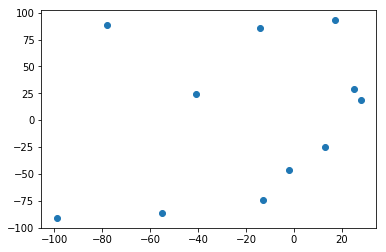

In [179]:
plt.scatter(latitudes, longitude)

In [180]:
print(list(zip(latitudes,longitude)))

[(-13, -74), (-2, -46), (17, 93), (-78, 89), (25, 29), (28, 19), (-55, -86), (-99, -91), (13, -25), (-14, 86), (-41, 24)]


In [181]:
import math
def distance(point_a,point_b):
    x_a,y_a = point_a
    x_b,y_b = point_b
    return math.sqrt((x_a-x_a)**2+(y_a-y_b)**2)

In [182]:
points = list(zip(latitudes,longitude))
distance_matrix=[]
distance_matrix=[[distance(a,b) for a in points]for b in points]

In [183]:
print(type(distance_matrix),len(distance_matrix))

<class 'list'> 11


In [184]:
print(distance_matrix)

[[0.0, 28.0, 167.0, 163.0, 103.0, 93.0, 12.0, 17.0, 49.0, 160.0, 98.0], [28.0, 0.0, 139.0, 135.0, 75.0, 65.0, 40.0, 45.0, 21.0, 132.0, 70.0], [167.0, 139.0, 0.0, 4.0, 64.0, 74.0, 179.0, 184.0, 118.0, 7.0, 69.0], [163.0, 135.0, 4.0, 0.0, 60.0, 70.0, 175.0, 180.0, 114.0, 3.0, 65.0], [103.0, 75.0, 64.0, 60.0, 0.0, 10.0, 115.0, 120.0, 54.0, 57.0, 5.0], [93.0, 65.0, 74.0, 70.0, 10.0, 0.0, 105.0, 110.0, 44.0, 67.0, 5.0], [12.0, 40.0, 179.0, 175.0, 115.0, 105.0, 0.0, 5.0, 61.0, 172.0, 110.0], [17.0, 45.0, 184.0, 180.0, 120.0, 110.0, 5.0, 0.0, 66.0, 177.0, 115.0], [49.0, 21.0, 118.0, 114.0, 54.0, 44.0, 61.0, 66.0, 0.0, 111.0, 49.0], [160.0, 132.0, 7.0, 3.0, 57.0, 67.0, 172.0, 177.0, 111.0, 0.0, 62.0], [98.0, 70.0, 69.0, 65.0, 5.0, 5.0, 110.0, 115.0, 49.0, 62.0, 0.0]]


In [185]:
import random
start = random.choice(points)
points_set = set(points)
points_set.remove(start)
solution = []

In [186]:
from functools import lru_cache

class Solution:   #X‰∏∫Ë∑ùÁ¶ªÁü©Èòµ
    def __init__(self,X,start_node):
        self.X = X
        self.start_node = start_node
        self.array = [[0]*(2**len(self.X)) for i in range(len(self.X))]#ËÆ∞ÂΩïÂ§Ñ‰∫éxËäÇÁÇπÔºåÊú™ÁªèÂéÜM‰∏™ËäÇÁÇπÊó∂ÔºåÁü©ÈòµÂÇ®Â≠òxÁöÑ‰∏ã‰∏ÄÊ≠•ÊòØM‰∏≠Âì™‰∏™ËäÇÁÇπ
    def transfer(self,sets):
        su = 0
        for s in sets:
            su = su + 2**s # ‰∫åËøõÂà∂ËΩ¨Êç¢
        return su
    
    def tsp(self):
        s = self.start_node
        num = len(self.X)
        cities = [i for i in range(num)]
        cities.pop(cities.index(s))  #‰ªéÈõÜÂêà‰∏≠ÂéªÊéâËµ∑ÂßãÁÇπÔºåÂΩ¢ÊàêÊú™ËÆøÈóÆËäÇÁÇπÈõÜÂêà
        node = s
        cities = tuple(cities)
        return self.solve(node,cities) 
    
    @lru_cache(maxsize=2**40)  #ËÆæÁΩÆÁºìÂ≠òÂä†Âø´ËøêË°åÈÄüÂ∫¶
    def solve(self,node,future_sets):
        if len(future_sets) == 0:    #ÈÄíÂΩíÁªàÊ≠¢Êù°‰ª∂ÔºåÊâÄÊúâËäÇÁÇπÈÉΩËÆøÈóÆÂÆåÊØïÔºåËøîÂõûÊúÄÂêéËäÇÁÇπÂíåÂàùÂßãËäÇÁÇπÁöÑË∑ùÁ¶ª
            return self.X[node][self.start_node]
        d = 0        
        distance = []
        for i in range(len(future_sets)): #ÈÅçÂéÜÊâÄÊúâÊú™ËÆøÈóÆËäÇÁÇπ
            s_i = future_sets[i]      
            copy = future_sets[:]      #‰∏∫ÊØèÊ¨°ÈÄíÂΩíÊñ∞Âª∫‰∏Ä‰∏™Êú™ËÆøÈóÆËäÇÁÇπÂàóË°®
            copy = list(copy)
            copy.pop(i)                #ÂéªÊéâËµ∑ÂßãËäÇÁÇπÔºåÂΩ¢ÊàêÊú™ËÆøÈóÆËäÇÁÇπÈõÜÂêà
            copy = tuple(copy)         #ÂèòÊàêtupleÔºåÂèòÊàêhashableÔºåÊâçËÉΩ‰ΩøÁî®lru_cacheË£ÖÈ•∞Âô®
            distance.append(self.X[node][s_i] + self.solve(s_i,copy))       #Â∞ÜÊØèÁßçÂèØËÉΩÊîæÂÖ•ÂàóË°®
        d = min(distance)      
        next_one = future_sets[distance.index(d)]        #ÈÄöËøáÊúÄÁü≠Ë∑ØÂæÑÊâæÂõûnext_nodeÔºåÂπ∂ÁîüÊàê‰∏ã‰∏ÄÊ≠•ËäÇÁÇπÁöÑÁü©Èòµarray
        c = self.transfer(future_sets)
        self.array[node][c] = next_one
        return d
    
    #ÂèÇËÄÉËá™https://blog.csdn.net/yg838457845/article/details/81127697

min path distance: 368.0
0 ---> 1
1 ---> 2
2 ---> 3
3 ---> 9
9 ---> 4
4 ---> 10
10 ---> 5
5 ---> 8
8 ---> 6
6 ---> 7
7 ---> 0


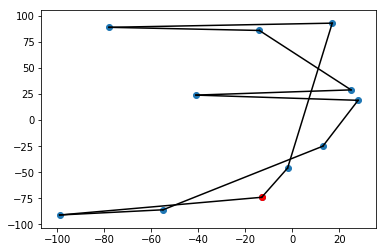

In [187]:
D = distance_matrix
S = Solution(D,0)
print("min path distance:",S.tsp())
lists = [i for i in range(len(S.X))]
start = S.start_node
while len(lists) > 0:
    lists.pop(lists.index(start))
    m = S.transfer(lists)
    next_node = S.array[start][m]
    print(start,"--->" ,next_node)
    plt.plot([points[start][0],points[next_node][0]],[points[start][1],points[next_node][1]],color='k')
    start = next_node
plt.scatter(latitudes, longitude)
plt.scatter([latitudes[0]],[longitude[0]],color='r')

ÁªôÂÆö‰∏Ä‰∏™ÂàùÂßãÁÇπ ùëÉ, Â∑≤Áªè ùëò‰∏™ËΩ¶ËæÜÔºåÂ¶Ç‰Ωï‰ªéËØ•ÁÇπÂá∫ÂèëÔºåÁªèËøô k ‰∏™ËΩ¶ËæÜÁªèËøáÊâÄ‰ª•ÁöÑÁÇπÂÖ®ÈÉ®‰∏ÄÊ¨°ÔºåËÄå‰∏îÊâÄËµ∞ËøáÁöÑË∑ØÁ®ãÊúÄÁü≠?

ÊÄùË∑ØÔºö

ÊääÁÇπÁöÑÈõÜÂêàÂàÜÊàêk‰∏™‰∏ç‰∏∫Á©∫ÁöÑÂ≠êÈõÜÔºåÂ∞ÜÂàùÂßãÁÇπpÂä†ÂÖ•Âà∞ÊØè‰∏™Â≠êÈõÜ‰∏≠ÔºåÂØπÊØè‰∏Ä‰∏™Â≠êÈõÜÂÅö‰∏ÄÊ¨°tspÁÆóÊ≥ïÔºåËÆ°ÁÆóÊØè‰∏™Â≠êÈõÜÊúÄÁü≠Ë∑ØÂæÑÔºåÁÑ∂ÂêéÂØπk‰∏™Â≠êÈõÜÊúÄÁü≠Ë∑ØÂæÑÊ±ÇÂíåÔºõ

ÊúÄÂêéÊØîËæÉÊâÄÊúâÂ≠êÈõÜÊãÜÂàÜÁöÑÊÉÖÂÜµ‰∏≠ËÆ°ÁÆóÁöÑÊúÄÁü≠Ë∑ØÂæÑÂíåÔºåÂì™‰∏™Êõ¥Áü≠ÔºåÂàôÊ±ÇËß£Âá∫kËæÜËΩ¶ÊÉÖÂÜµ‰∏ãÁöÑÊúÄÁü≠Ë∑ØÂæÑ

In [188]:
def div_set(s,p,k): 
    '''
    ÂèÇËÄÉhttps://bbs.csdn.net/topics/390281735‰∏≠lijinlin_loveÂÖ≥‰∫éÂ∞Ü‰∏Ä‰∏™ÈõÜÂêàÊãÜÂàÜÊàê‰∏§‰∏™ÁöÑÊñπÊ≥ïÔºåÊãìÂ±ïÂá∫ÊãÜÂàÜÊàêk‰∏™Â≠êÈõÜÁöÑÊñπÊ≥ï
    ‰∏∫‰∫ÜÂêéÈù¢Êñπ‰æø‰ΩøÁî®ËøîÂõûÁöÑÁªìÊûúÔºåÂèàÂ∞ÜËµ∑ÁÇπpÂàÜÂà´Âä†ÂÖ•Â≠êÈõÜ‰∏≠
    s‰∏∫ÁÇπÁöÑindexÂ∫èÂàóÔºåÂπ∂ÈùûÁÇπÂùêÊ†áÔºåÁÇπÂùêÊ†áÂ≠òÂú®points‰∏≠
    '''
    s.pop(s.index(p))
    n = len(s)
    subset_all = []
    for x in range(k**n):
        s1 = []
        s2 = []
        s3 = []
        for i in range(n):
            ki = k**i
            if(x//ki)%k == 0:
                s1.append(s[i])
            elif(x//ki)%k == 1:
                s2.append(s[i])
            else:
                s3.append(s[i])
        if s1 and s2 and s3:
            s1.append(p)
            s2.append(p)
            s3.append(p)
            subset = set((tuple(s1),tuple(s2),tuple(s3)))
            if subset not in subset_all:
                subset_all.append(subset)
    return subset_all

# ÂÅáËÆæÈõÜÂêà‰∏∫ ÔΩõa,b,c,d,e,f,g,hÔΩù
# 0 0 0 0 0 0 0 1 
# a b c d e f g h  => Ë°®Á§∫ÂàíÂàÜ‰∏∫ ÔΩõa,b,c,d,e,f,gÔΩùÔΩõhÔΩù
# Â¶ÇÊ≠§‰ª•Êù• ÈóÆÈ¢òÂ∞±ÁÆÄÂåñ‰∏∫‰ªé1 -> 2^(N-1) ‰æùÊ¨°Âà§Êñ≠ÊØè‰∏™Êï∞Â≠óÁöÑ2ËøõÂà∂‰ΩçÊòØ0 ËøòÊòØ1 ÊòØ1Â∞±Á¥ØÂä†  

In [189]:
def get_dis_matrix(s): #Ê†πÊçÆÂ∫èÂàóÊ±ÇÂØπÂ∫îÁÇπÁöÑË∑ùÁ¶ªÁü©Èòµ
    '''
    s‰∏∫ÁÇπÁöÑindexÂ∫èÂàóÔºåÂπ∂ÈùûÁÇπÂùêÊ†áÔºåÁÇπÂùêÊ†áÂ≠òÂú®points‰∏≠
    '''
    n = len(s)
    matrix = [[distance(points[i],points[j]) for i in s]for j in s]
    return matrix

In [190]:
def get_tsp_path(s,p):
    '''
    Ê†πÊçÆÂ∫èÂàósÂíåËµ∑ÁÇπpÁîüÊàêtspË∑ØÁ∫øÔºåÂ∞Ü‰∏äÈù¢ÁîüÊàêË∑ØÁ∫øÂõæÁöÑËØ≠Âè•ÊîæËøõ‰∏Ä‰∏™ÂáΩÊï∞‰∏≠Ôºå
    Êñπ‰æøÂêéÈù¢Ë∞ÉÁî®.
    s‰∏∫ÁÇπÁöÑindexÂ∫èÂàóÔºåÂπ∂ÈùûÁÇπÂùêÊ†áÔºåÁÇπÂùêÊ†áÂ≠òÂú®points‰∏≠
    '''
    path = []
    matrix = get_dis_matrix(s)
    S = Solution(matrix,p)
    result = S.tsp()
    lists = [i for i in range(len(matrix))]
    start = p
    while len(lists) > 0:
        lists.pop(lists.index(start))
        m = S.transfer(lists)
        next_node = S.array[start][m]
        path.append((s[start],s[next_node]))   #start nex_node‰∏∫È°∫Â∫èÂ∫èÂàóÁöÑÊ†áÂè∑ÂÄºÔºåÈúÄË¶ÅÂΩìÊàêÁ¥¢ÂºïÂèñÂá∫ÁªôÂÆöÂ∫èÂàós‰∏≠ÁöÑÂÄº
        start = next_node
    return result,path  

In [174]:
color = [ 'black',
 'blue',
 'blueviolet',
 'brown',
 'darkblue',
 'darkred',
 'darkviolet',
 'deeppink',
 'firebrick', 
 'gold',
 'gray',
 'green',
 'lime',
 'limegreen',
 'pink',
 'purple',
 'red',
 'violet',
 'yellow',]

In [194]:
def k_tsp(s,p,k): #ÈõÜÂêàsËµ∑ÂßãÁÇπ‰∏∫pÔºåkËæÜËΩ¶ÁöÑtspÈóÆÈ¢ò
    subset_all = div_set(s,p,k)   #ÊääsÊãÜÂàÜÊàêk‰∏™Â≠êÈõÜÔºåÂ∞ÜËµ∑ÂßãÁÇπpÂä†Âà∞ÊØè‰∏™Â≠êÈõÜ‰∏≠
    get_tsp_path_result_list = []
    sum_res = 0
    all_sum_res = []
    for subsets in subset_all:   #ÈÅçÂéÜÊâÄÊúâÂ≠êÈõÜÊãÜÂàÜÁöÑÂèØËÉΩÔºåÊØèÁßçÂèØËÉΩÂåÖÂê´k‰∏™Â≠êÈõÜ
        for subset in subsets:   # ÈÅçÂéÜk‰∏™Â≠êÈõÜÔºåÊØè‰∏™Â≠êÈõÜÈÉΩÂåÖÂê´Ëµ∑ÁÇπp
            list_set = list(subset)
            result,path = get_tsp_path(list_set,p)  #ÂæóÂà∞ÊØè‰∏™Â≠êÈõÜÁöÑÊúÄÁü≠Ë∑ØÂæÑ
            get_tsp_path_result_list.append([result,path])   #‰øùÂ≠òËÆ°ÁÆóÁªìÊûú
            sum_res += result      #ËøôÁßçÂ≠êÈõÜÊãÜÂàÜÊÉÖÂÜµ‰∏≠ÁöÑÊúÄÁü≠Ë∑ØÂæÑÂÄº‰πãÂíå
        all_sum_res.append(sum_res) #‰øùÂ≠òÊâÄÊúâÂ≠êÈõÜÊãÜÂàÜÊÉÖÂÜµÁöÑÊúÄÁü≠Ë∑ØÂæÑÂíå
    best_path_dis = min(all_sum_res)
    best_path_index = all_sum_res.index(best_path_dis)  #Ê†πÊçÆÊúÄÁü≠Ë∑ØÂæÑÂÄºÊâæÂà∞ËøôÁßçÊÉÖÂÜµÁöÑÁ¥¢Âºï
    for i in range(k):                                #ÊØè‰∏™ÊúÄÁü≠Ë∑ØÂæÑÂØπÂ∫îk‰∏™Â≠êÈõÜÂêàÁöÑË∑ØÂæÑÊÉÖÂÜµ
        [sub_result,sub_path] = get_tsp_path_result_list[best_path_index*k+i]
        select_color = random.choice(color)            #Êñπ‰æøÂú®Âõæ‰∏≠‰ª•‰∏çÂêåÈ¢úËâ≤Âå∫Âà´‰∏çÂêåÁ∫øË∑Ø
        print('color:',select_color)
        for start,next_node in sub_path:
            print(start,"--->" ,next_node)
            plt.plot([points[start][0],points[next_node][0]],[points[start][1],points[next_node][1]],color=select_color)  
        print('==========')
    plt.scatter(latitudes, longitude)
    plt.scatter([latitudes[p]],[longitude[p]],color='r')                 

In [ ]:
s=[i for i in range(len(points))]
p = 0

In [200]:
k = 4

color: blueviolet
2 ---> 0
0 ---> 2
color: gold
1 ---> 0
0 ---> 1
color: purple
3 ---> 4
4 ---> 5
5 ---> 6
6 ---> 7
7 ---> 0
0 ---> 8
8 ---> 10
10 ---> 9
9 ---> 3
color: lime
3 ---> 0
0 ---> 3


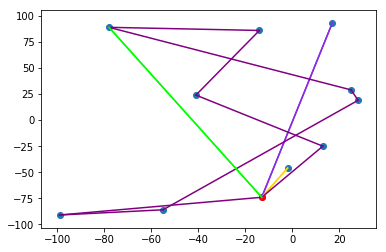

In [198]:
k_tsp(s,p,k)

color: lime
2 ---> 0
0 ---> 2
color: pink
1 ---> 0
0 ---> 1
color: darkred
3 ---> 4
4 ---> 5
5 ---> 6
6 ---> 7
7 ---> 0
0 ---> 8
8 ---> 10
10 ---> 9
9 ---> 3


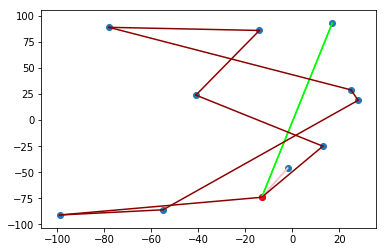

In [207]:
s=[i for i in range(len(points))]
p = 0
k=3
k_tsp(s,p,k)

#ÂâçÈù¢‰∏§‰∏™Â≠êÈõÜÊÄªÊòØÂè™ÂåÖÊã¨Ëµ∑ÁÇπÂú®ÂÜÖÁöÑ‰∏§‰∏™ÁÇπÔºå‰∏çÁü•ÈÅìÊòØÂê¶ÊúâÈóÆÈ¢òÔºåk=5Êó∂Êó∂Èó¥Â§™ÈïøÊ≤°ÁÆóÂá∫Êù•

shuro